In [1]:
# Importar los modulos

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
datos = pd.read_csv('Desktop/Datasets/GOOGL.csv')
datos.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-14,724.440002,739.890015,705.000000,731.390015,731.390015,2777900
1,2016-01-15,709.989990,724.159973,701.510010,710.489990,710.489990,3833800
2,2016-01-19,720.150024,725.349976,709.849976,719.080017,719.080017,2436200
3,2016-01-20,705.900024,726.950012,687.780029,718.559998,718.559998,4122000
4,2016-01-21,720.169983,737.669983,711.109985,726.669983,726.669983,2596900


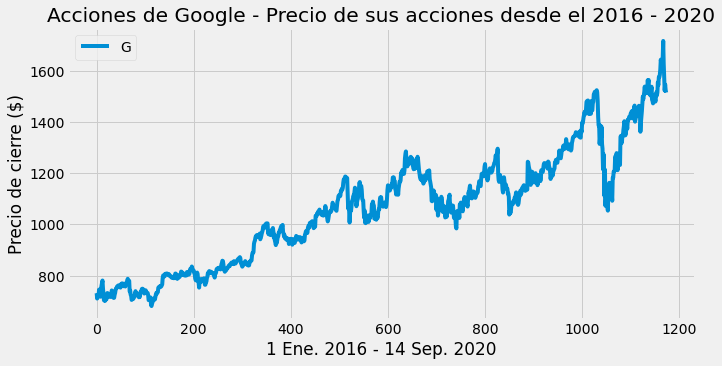

In [3]:
# Graficar los datos
plt.figure(figsize = (10, 5))
plt.plot(datos['Close'], label = 'Google Stock')
plt.title('Acciones de Google - Precio de sus acciones desde el 2016 - 2020')
plt.xlabel('1 Ene. 2016 - 14 Sep. 2020')
plt.ylabel('Precio de cierre ($)')
plt.legend('Google')
plt.show()

In [4]:
MVS30 = pd.DataFrame()
MVS30['Close'] = datos['Close'].rolling(window = 30).mean()
MVS30

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1169,1553.717000
1170,1553.522664
1171,1554.975330
1172,1555.059998


In [5]:
MVS30[MVS30.index == 29]

,Close
29,727.228998


In [6]:
MVS100 = pd.DataFrame()
MVS100['Close'] = datos['Close'].rolling(window = 100).mean()
MVS100

,Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1169,1454.963906
1170,1457.625605
1171,1460.307905
1172,1462.956906


In [7]:
MVS100[MVS100.index == 99]

,Close
99,737.990499


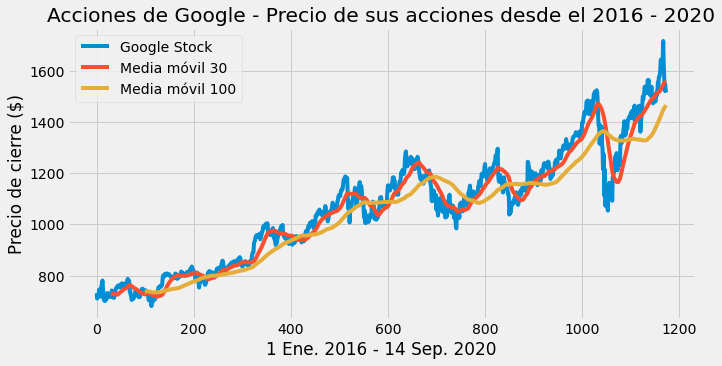

In [8]:
# Graficar los datos
plt.figure(figsize = (10, 5))
plt.plot(datos['Close'], label = 'Google Stock')
plt.plot(MVS30['Close'], label = 'Media móvil 30')
plt.plot(MVS100['Close'], label = 'Media móvil 100')
plt.title('Acciones de Google - Precio de sus acciones desde el 2016 - 2020')
plt.xlabel('1 Ene. 2016 - 14 Sep. 2020')
plt.ylabel('Precio de cierre ($)')
plt.legend(loc = 'upper left')
plt.show()

In [9]:
data = pd.DataFrame()
data['Google'] = datos['Close']
data['MVS30'] = MVS30['Close']
data['MVS100'] = MVS100['Close']
data

,Google,MVS30,MVS100
0,731.390015,NaN,NaN
1,710.489990,NaN,NaN
2,719.080017,NaN,NaN
3,718.559998,NaN,NaN
4,726.669983,NaN,NaN
...,...,...,...
1169,1581.209961,1553.717000,1454.963906
1170,1523.599976,1553.522664,1457.625605
1171,1547.229980,1554.975330,1460.307905
1172,1526.050049,1555.059998,1462.956906


In [10]:
def senal(data):
    compra = []
    venta = []
    condicion = 0
    
    for dia in range(len(data)):
        
        if data['MVS30'][dia] > data['MVS100'][dia]:
            if condicion != 1:
                compra.append(data['Google'][dia])
                venta.append(np.nan)
                condicion = 1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
            
        elif data['MVS30'][dia] < data['MVS100'][dia]:
            if condicion != -1:
                venta.append(data['Google'][dia])
                compra.append(np.nan)
                condicion = -1
            else:
                compra.append(np.nan)
                venta.append(np.nan)
        else:
            compra.append(np.nan)
            venta.append(np.nan)
            
    return (compra, venta)    

In [11]:
senales = senal(data)
data['Compra'] = senales[0]
data['Venta'] = senales[1]
data

,Google,MVS30,MVS100,Compra,Venta
0,731.390015,NaN,NaN,NaN,NaN
1,710.489990,NaN,NaN,NaN,NaN
2,719.080017,NaN,NaN,NaN,NaN
3,718.559998,NaN,NaN,NaN,NaN
4,726.669983,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1169,1581.209961,1553.717000,1454.963906,NaN,NaN
1170,1523.599976,1553.522664,1457.625605,NaN,NaN
1171,1547.229980,1554.975330,1460.307905,NaN,NaN
1172,1526.050049,1555.059998,1462.956906,NaN,NaN


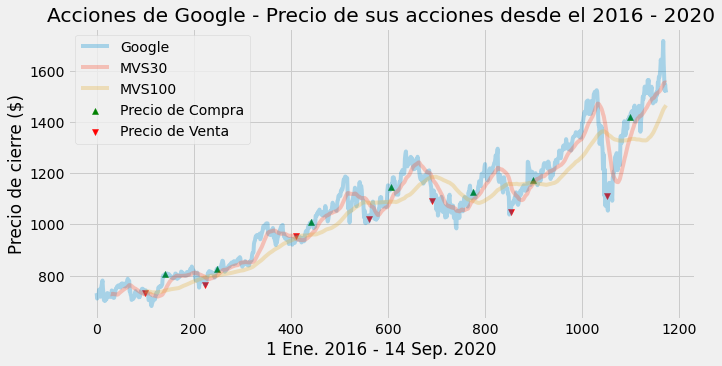

In [12]:
plt.figure(figsize = (10, 5))
plt.plot(data['Google'], label = 'Google', alpha = 0.3)
plt.plot(data['MVS30'], label = 'MVS30', alpha = 0.3)
plt.plot(data['MVS100'], label = 'MVS100', alpha = 0.3)
plt.scatter(data.index, data['Compra'], label = 'Precio de Compra', marker = '^', color = 'green')
plt.scatter(data.index, data['Venta'], label = 'Precio de Venta', marker = 'v', color = 'red')
plt.title('Acciones de Google - Precio de sus acciones desde el 2016 - 2020')
plt.xlabel('1 Ene. 2016 - 14 Sep. 2020')
plt.ylabel('Precio de cierre ($)')
plt.legend(loc = 'upper left')
plt.show()